1. Download the dataset: Dataset

data set is downloaded

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2. Load the dataset into the tool.

In [2]:
df= pd.read_csv('/content/penguins_size.csv')
df.head(10)


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [3]:
df.shape

(344, 7)

3. Perform Below Visualizations.
● Univariate Analysis
● Bi- Variate Analysis
● Multi-Variate Analysis

<ipython-input-4-02519e1c6811>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.body_mass_g)


<Axes: xlabel='body_mass_g', ylabel='Density'>

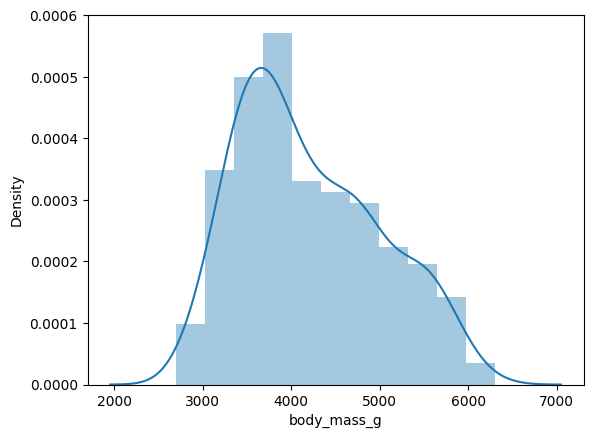

In [4]:
# uni-variate analysis
#distplot
sns.distplot(df.body_mass_g)

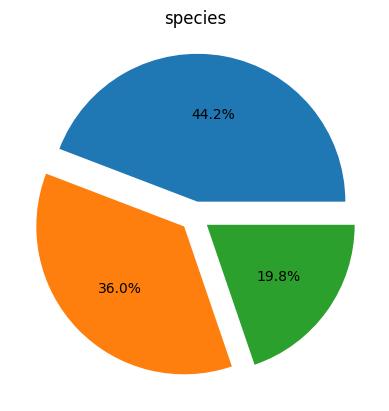

In [5]:
# univariate analysis
#piechart
plt.pie(df.species.value_counts(),[0.1,0.1,0.1],autopct='%1.1f%%')
plt.title('species')
plt.show()

<Axes: ylabel='sex'>

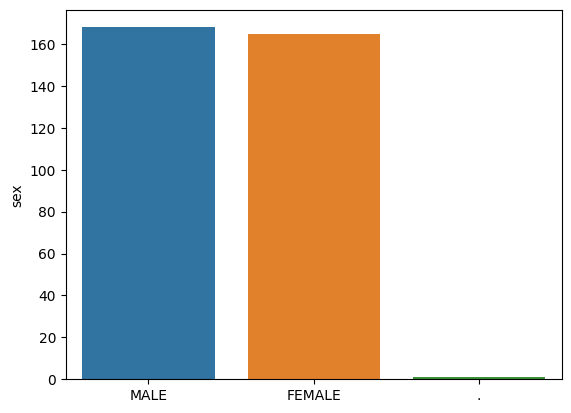

In [6]:
#univariate analysis
#barplot
sns.barplot(x=df.sex.value_counts().index,y=df.sex.value_counts())

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

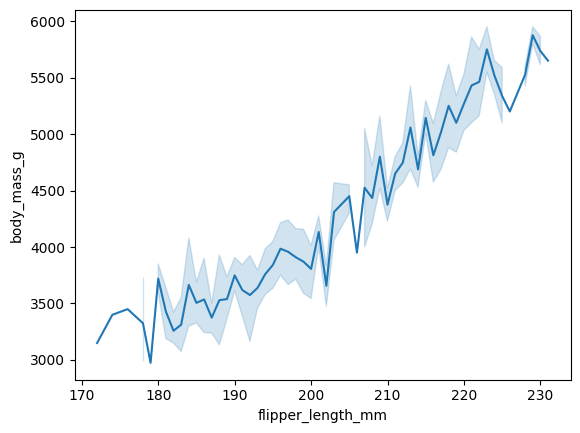

In [7]:
#bivariate analysis
#lineplot
sns.lineplot(x=df.flipper_length_mm,y=df.body_mass_g)

<Axes: xlabel='culmen_depth_mm', ylabel='body_mass_g'>

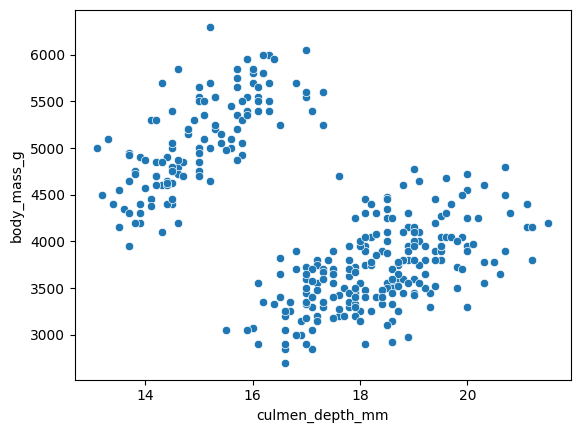

In [8]:
#bivariate analysis
#scatterplot
sns.scatterplot(x=df.culmen_depth_mm,y=df.body_mass_g)

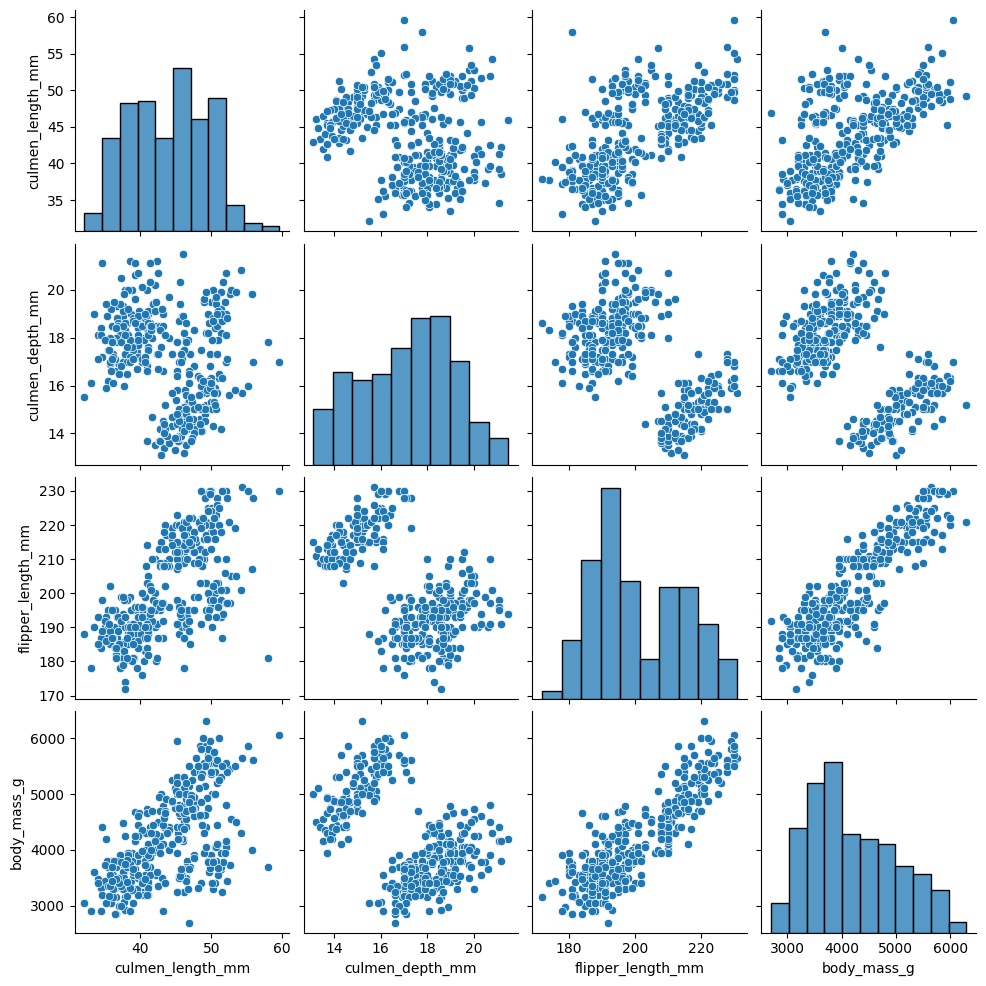

In [9]:
#multivariate analysis
#pairplot
sns.pairplot(df)

<ipython-input-10-a17d2907ca34>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

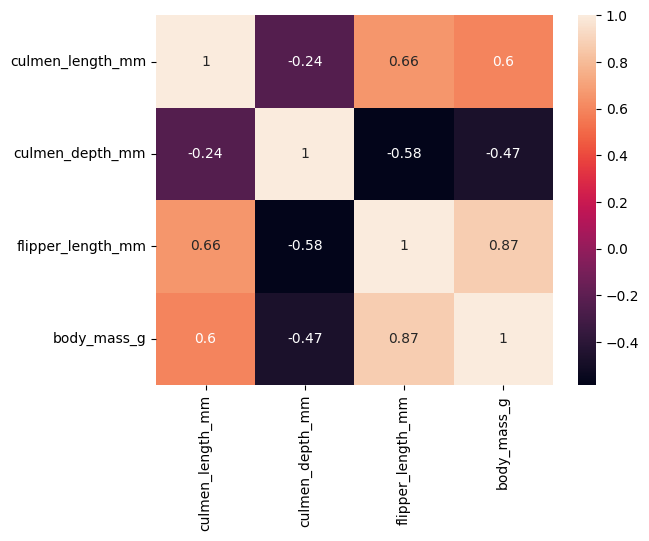

In [10]:
#multivariate analysis
#heatmap
sns.heatmap(df.corr(),annot=True)

4. Perform descriptive statistics on the dataset.

In [11]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


5. Check for Missing values and deal with them

In [12]:
df.isnull().any() # checking if there are any null values or not

species              False
island               False
culmen_length_mm      True
culmen_depth_mm       True
flipper_length_mm     True
body_mass_g           True
sex                   True
dtype: bool

In [13]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [14]:
# finding the data type of the parameters
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [15]:
# null values are present in culmen_length_mm ,culmen_depth_mm ,flipper_length_mm ,body_mass_g ,sex

In [16]:
# we have null values in categorical column ,that is in sex column so we need to replace null values with mode

most_frequent_sex = df['sex'].value_counts().idxmax()
df['sex'].fillna(most_frequent_sex, inplace=True)

In [17]:
# And we have null valalues in numerical col,that is in culmen_length_mm ,culmen_depth_mm ,flipper_length_mm ,body_mass_g columns
# so we need to replace null values with mean

df.culmen_length_mm = df.culmen_length_mm.fillna(df.culmen_length_mm.median())
df.culmen_depth_mm = df.culmen_depth_mm.fillna(df.culmen_depth_mm.median())
df.flipper_length_mm = df.flipper_length_mm.fillna(df.flipper_length_mm.median())
df.body_mass_g = df.body_mass_g.fillna(df.body_mass_g.median())

In [18]:
df.isnull().any()

species              False
island               False
culmen_length_mm     False
culmen_depth_mm      False
flipper_length_mm    False
body_mass_g          False
sex                  False
dtype: bool

In [19]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [20]:
df.sex.value_counts()

MALE      178
FEMALE    165
.           1
Name: sex, dtype: int64

In [21]:
df.sex = df.sex.replace(".","MALE")

In [22]:
df.sex.value_counts()

MALE      179
FEMALE    165
Name: sex, dtype: int64

In [23]:
df.species.value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [24]:
df.island.value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

6. Find the outliers and replace them outliers

In [25]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.50,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.30,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,44.45,17.3,197.0,4050.0,MALE
4,Adelie,Torgersen,36.70,19.3,193.0,3450.0,FEMALE


<Axes: >

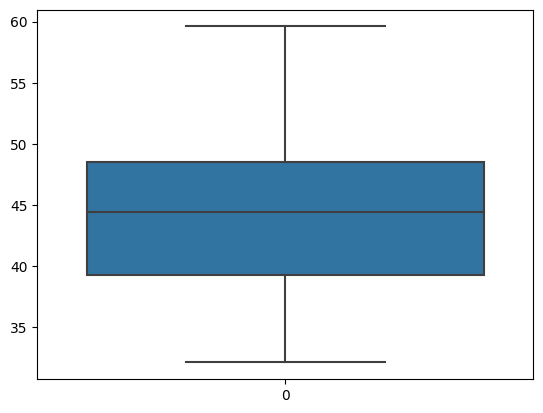

In [26]:
# box plot for outlier detection
sns.boxplot(df.culmen_length_mm	)

<Axes: >

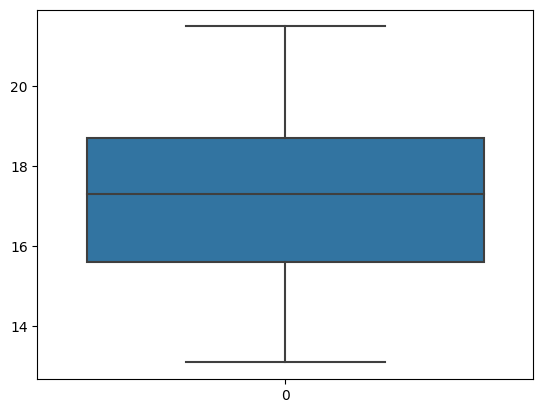

In [27]:
sns.boxplot(df.culmen_depth_mm	)

<Axes: >

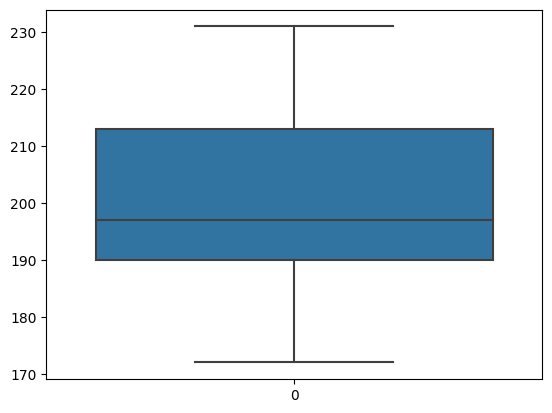

In [28]:
sns.boxplot(df.flipper_length_mm)

<Axes: >

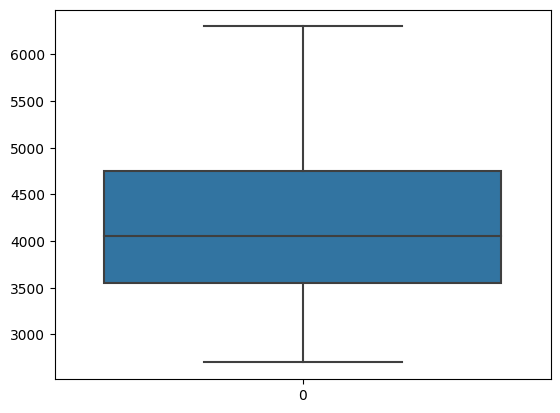

In [29]:
sns.boxplot(df.body_mass_g)

In [30]:
# from above boxplots we can conclude that there are no outliers

8. Check for Categorical columns and perform encoding.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   344 non-null    float64
 3   culmen_depth_mm    344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [32]:
# speccies,island and sex are categorial  columns

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
le= LabelEncoder()

In [35]:
df.species= le.fit_transform(df.species)
df.island= le.fit_transform(df.island)
df.sex= le.fit_transform(df.sex)

In [36]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.10,18.7,181.0,3750.0,1
1,0,2,39.50,17.4,186.0,3800.0,0
2,0,2,40.30,18.0,195.0,3250.0,0
3,0,2,44.45,17.3,197.0,4050.0,1
4,0,2,36.70,19.3,193.0,3450.0,0


7. Check the correlation of independent variables with the target

In [37]:
df.corr().sex.sort_values(ascending=False)

sex                  1.000000
body_mass_g          0.407107
culmen_depth_mm      0.354791
culmen_length_mm     0.322871
flipper_length_mm    0.241941
species              0.010240
island               0.002893
Name: sex, dtype: float64

9. Split the data into dependent and independent variables

In [38]:
# independent variables
x = df.drop('sex', axis=1)
x.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,0,2,39.10,18.7,181.0,3750.0
1,0,2,39.50,17.4,186.0,3800.0
2,0,2,40.30,18.0,195.0,3250.0
3,0,2,44.45,17.3,197.0,4050.0
4,0,2,36.70,19.3,193.0,3450.0


In [39]:
y = df['sex']               # Dependent variable
y.head()

0    1
1    0
2    0
3    1
4    0
Name: sex, dtype: int64

10. Scaling the data.

In [40]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()

In [41]:
# scale data for better accuracy
x_scaled=pd.DataFrame(scale.fit_transform(x),columns=x.columns)
x_scaled

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,0.0,1.0,0.254545,0.666667,0.152542,0.291667
1,0.0,1.0,0.269091,0.511905,0.237288,0.305556
2,0.0,1.0,0.298182,0.583333,0.389831,0.152778
3,0.0,1.0,0.449091,0.500000,0.423729,0.375000
4,0.0,1.0,0.167273,0.738095,0.355932,0.208333
...,...,...,...,...,...,...
339,1.0,0.0,0.449091,0.500000,0.423729,0.375000
340,1.0,0.0,0.534545,0.142857,0.728814,0.597222
341,1.0,0.0,0.665455,0.309524,0.847458,0.847222
342,1.0,0.0,0.476364,0.202381,0.677966,0.694444


11. Split the data into training and testing

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.3,random_state=0)

In [43]:
x_train.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
219,0.5,0.5,0.658182,0.666667,0.440678,0.298611
271,1.0,0.0,0.596364,0.119048,0.813559,0.722222
266,1.0,0.0,0.487273,0.095238,0.644068,0.416667
335,1.0,0.0,0.836364,0.345238,0.983051,0.875000
217,0.5,0.5,0.636364,0.607143,0.355932,0.298611


12. check the training and testing data shape.

In [44]:
x_train.shape

(240, 6)

In [45]:
x_test.shape

(104, 6)